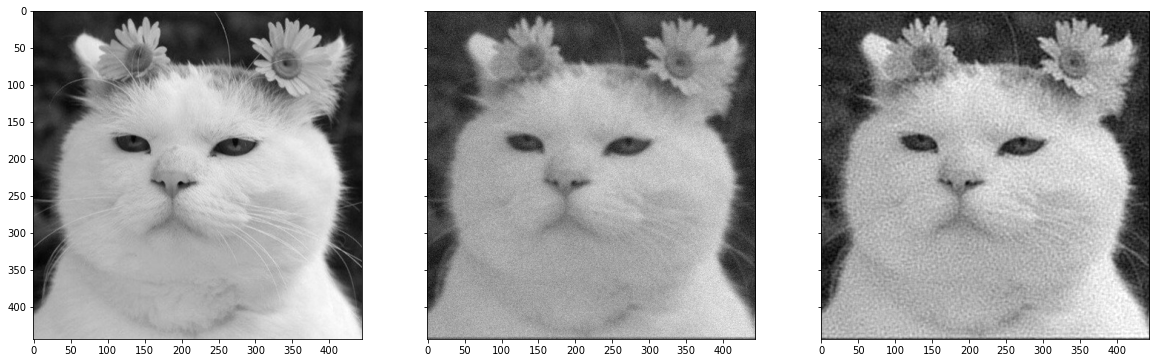

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, data, restoration
from skimage.transform import resize
from skimage.metrics import peak_signal_noise_ratio
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

def conv2d(img, psf, k):
    M, N = img.shape
    freq = fft2(img)
    
    psf = np.pad(
        psf,
        ((((M-k)//2, (M-k)//2+1), ((N-k)//2, (N-k)//2+1))),
        mode = 'constant'
    )
    freq_kernel = fft2(ifftshift(psf))
    return np.abs(ifft2(freq * freq_kernel))

def plot_freq_filter(F, title=None, fontsize =20):
    plt.imshow(
        20*np.log10(0.01 + np.abs(fftshift(F))),
        cmap ='coolwarm'
    )
    
    plt.colorbar()
    
img = color.rgb2gray(io.imread('./images/cat-01.jpg'))
#size 조정
img = resize(img, (444, 444))
k=5
psf =np.ones(( k , k)) / k**2
img1 = conv2d(img, psf, k)
img1 += 0.2 * img.std() * np.random.standard_normal(img.shape)
img2, _ = restoration.unsupervised_wiener(img1, psf)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,12), sharey=True, sharex=True)
plt.gray()
axes[0].imshow(img)
axes[1].imshow(img1)
axes[2].imshow(img2)
plt.show()
